In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic-data.csv', engine = 'python')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Questions to be answered by looking at this dataset :-
    1) What is the mean and median of the ages of this dataset and whether it falls on a normal distribution?
    2) Who had a better chance of survival among men, women and children?
    3) Are survival trends different for different socio-economic classes?
    4) What were the age groups that were most likely to survive?
    5) Do families tend to survive the bigger they are or were people who travelled alone more likely to survive?
    6) Where did most of the people embark on their journey from? What were the proportions of people of different classes from different embarking points?
    7) Was there any correlation between the Ages of passengers and the fare that they paid? Did passengers tend to book fancier cabins if they were travelling with more family members?

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The first thing we notice is the missing values of ages in the dataset. To fill these values we will take 2 sets of random values (1 for men, 1 for women) with a range of mean +/- the standard deviation for each. 

In [7]:
mean_age_men = titanic[titanic['Sex']=='male']['Age'].mean()
std_age_men = titanic[titanic['Sex']=='male']['Age'].std(ddof = 1)
mean_age_men, std_age_men

(30.72664459161148, 14.678200823816601)

In [8]:
female_age_mean = titanic[titanic['Sex'] == 'female']['Age'].mean()
std_age_women = titanic[titanic['Sex'] == 'female']['Age'].std(ddof = 1)
female_age_mean, std_age_women

(27.915708812260537, 14.110146457544134)

In [9]:
female_nan_age = titanic[titanic['Sex']== 'female']['Age'][np.isnan(titanic['Age'])]
male_nan_age = titanic[titanic['Sex'] == 'male']['Age'][np.isnan(titanic['Age'])]
UL_women = female_age_mean + std_age_women
LL_women = female_age_mean - std_age_women
UL_men = mean_age_men + std_age_men
LL_men = mean_age_men - std_age_women
#creating an upper limit and lower limit for the men and women age ranges
len(male_nan_age), len(female_nan_age)

(124, 53)

In [10]:
missing_w_age = np.random.randint((LL_women),(UL_women),(len(female_nan_age)))
missing_m_age = np.random.randint(LL_men, UL_men, len(male_nan_age))
#creating a list of ages for men and women to fill in the missing values

In [11]:
titanic.loc[(titanic.Sex == 'female') & (np.isnan(titanic.Age)), 'Age'] = missing_w_age
titanic.loc[(titanic.Sex == 'male') & (np.isnan(titanic.Age)), 'Age'] = missing_m_age

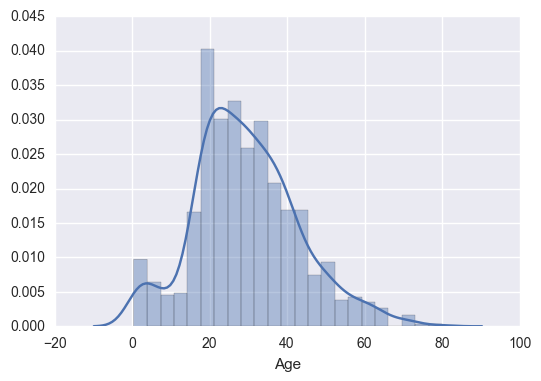

In [12]:
sns.distplot(titanic.Age) #Age distribution of all passengers on board

In [13]:
titanic.groupby('Sex')['PassengerId'].count()  #checking to see how many male and female passengers were on board respectively


Sex
female    314
male      577
Name: PassengerId, dtype: int64

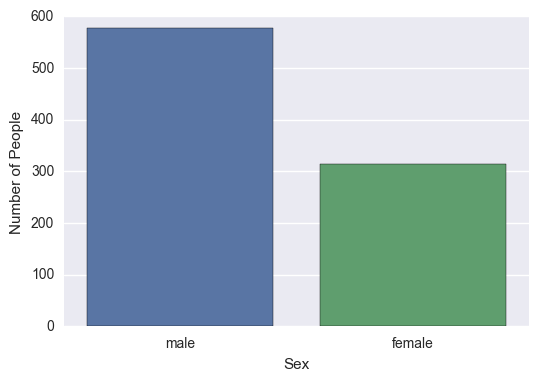

In [14]:
gender_count = sns.countplot(titanic.Sex)
gender_count.set(ylabel = 'Number of People')
#graphical representation of the number of people on board based on men and women

Survived
0    549
1    342
Name: PassengerId, dtype: int64

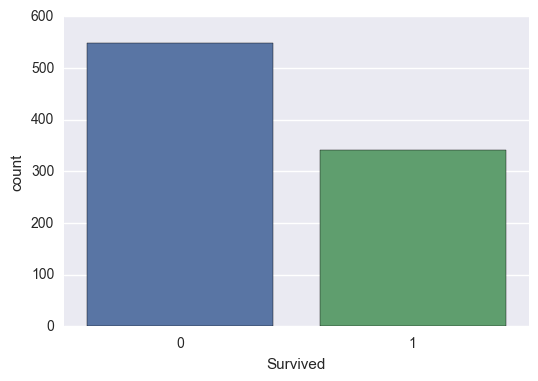

In [15]:
sns.countplot(titanic.Survived) #to show the number of survivors vs casualties
titanic.groupby('Survived')['PassengerId'].count()

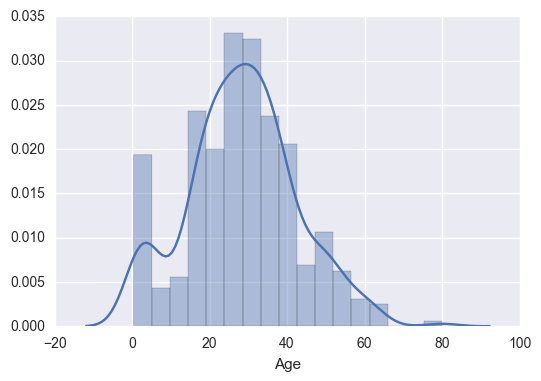

In [16]:
survived_by_age = titanic[titanic.Survived == 1]['Age']
sns.distplot(survived_by_age) # Age distribution of survivors

The graph above shows us that most of the survivors were young people (17 - 35) and children under 2 years.


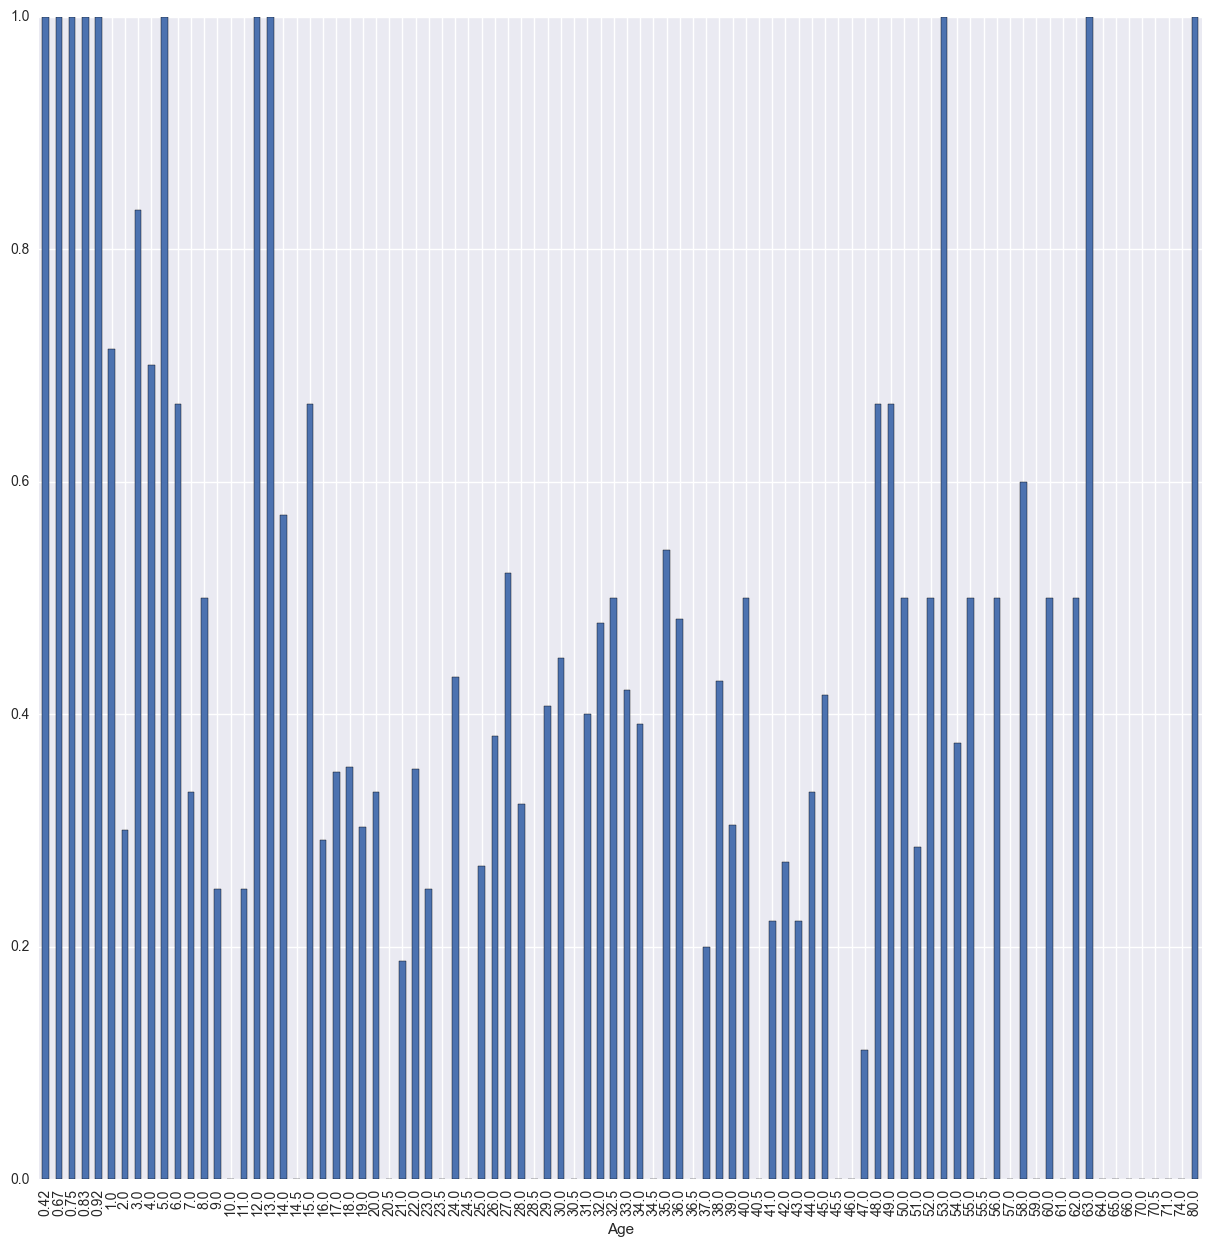

In [17]:
by_age = titanic.groupby('Age')['Survived'].mean()
by_age.plot(kind= 'bar', figsize = (15,15)) #% survivors based on each age

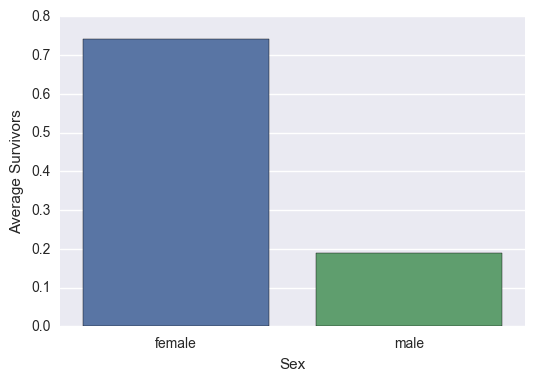

In [18]:
by_sex = titanic[['Sex', 'Survived']].groupby(['Sex'],as_index= False).mean()
by_sex_plot = sns.barplot(x = 'Sex', y = 'Survived', data = by_sex) #to show the average survivors based on sex.
by_sex_plot.set(ylabel='Average Survivors')

From the graph above, it is fairly obvious that women were given more preference to the men in terms of rescue operations.
65% of the population that boarded the titanic were male, yet only 19%  of them survived. Women, on the other hand constituted 35% of the population, 75% of them being survivors. This could probably be due to standard procedures during times of emergencies, where the women and children are generally evacuated first.

In [19]:
Wom_child = titanic[(titanic.Sex == 'Female') | (titanic.Age <= 10)]
Wom_child['Survived'].mean()
# to create a group of passengers consisting of women and children(Age < 10) and calculating the average number of survivors in this group

0.59375

The % of survivors among children(< 10) and women was 60% which is much more than the overall average of 38% and significantly more than the male survival rate of 19%. 

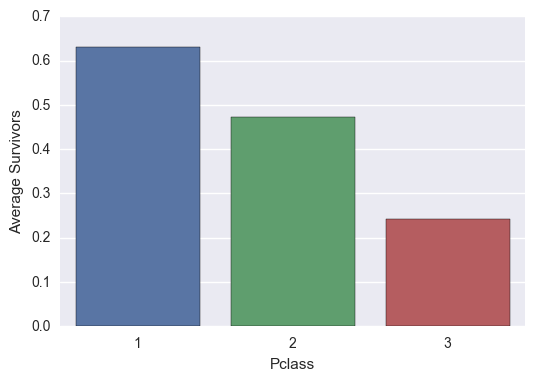

In [20]:
by_class = titanic[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean()
by_class_plot = sns.barplot(x = 'Pclass', y='Survived', data = by_class)  #survivors based on class
by_class_plot.set(ylabel='Average Survivors')

From the graph above, it can be seen that the highest percentage of survivors based on class are the upper class people. Either they were the first ones to be evacuated or their cabins were in locations that were more accessible to lifeboats and escape routes. Of course, to confirm these, we would require more information.

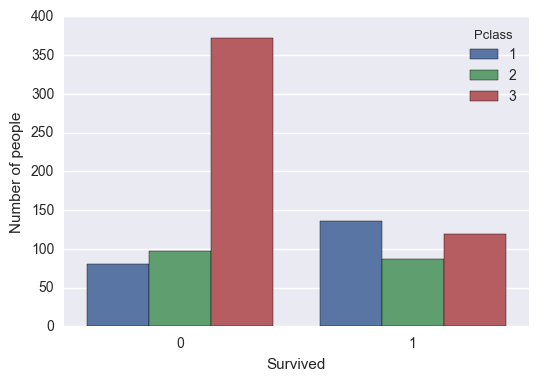

In [21]:
number_by_class = sns.countplot(x='Survived', hue="Pclass", data=titanic)
number_by_class.set(ylabel='Number of people') # to show distribution of survivors and casualties based on class

Since we cannot do much with separate values for parents and siblings, it would be better to create a new column by adding up the two values to help us with our analysis.

Also, it is better to classify the family sizes as 'Single', 'Small'(family of 4 or less) and 'Big' (family size greater than 4)

In [22]:
titanic['Family'] = titanic['Parch'] + titanic['SibSp']

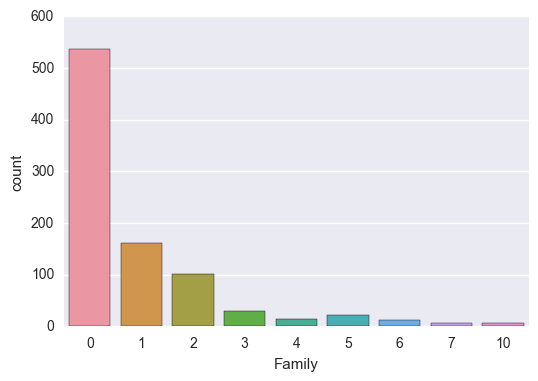

In [23]:
sns.countplot(titanic.Family) #to show the distribution of family sizes that had boarded

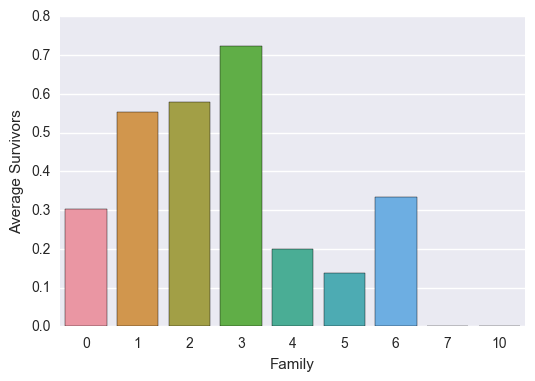

In [24]:
by_family = titanic[['Family', 'Survived']].groupby(['Family'], as_index = False).mean()
by_family_graph = sns.barplot(x = 'Family', y = 'Survived', data = by_family) #graph to depict survivors vs family size
by_family_graph.set(ylabel='Average Survivors')

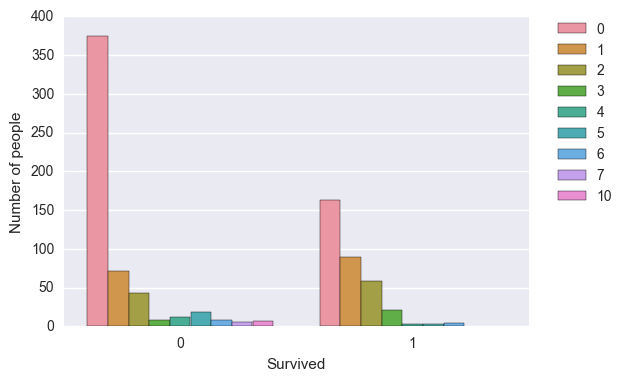

In [25]:
number_by_relation = sns.countplot(x='Survived',hue = 'Family', data=titanic)
number_by_relation.set(ylabel='Number of people') #to compare deaths and survivors based on family size
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #to move the legend to the side 

In [26]:
titanic['Relation'] = 0
for index, value in titanic.iterrows():
    if value['Family'] >= 3:
        titanic['Relation'].loc[index] = 'Big'
    if value['Family'] > 0 and value['Family'] < 3:
        titanic['Relation'].loc[index] = 'Small'
    if value['Family'] == 0:
        titanic['Relation'].loc[index] = 'Single'
#To create a new column where families were classified based on size

C:\Users\shawar\Anaconda2\lib\site-packages\pandas\core\indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


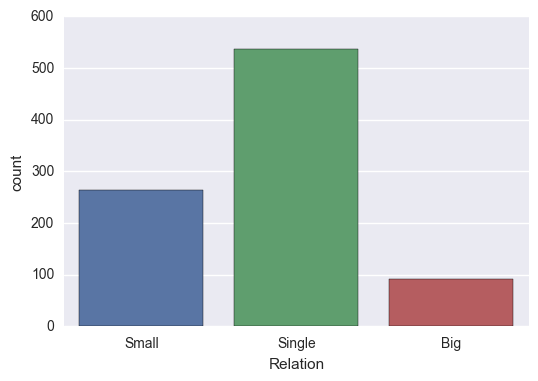

In [27]:
relation_total = sns.countplot(x = 'Relation', data = titanic)

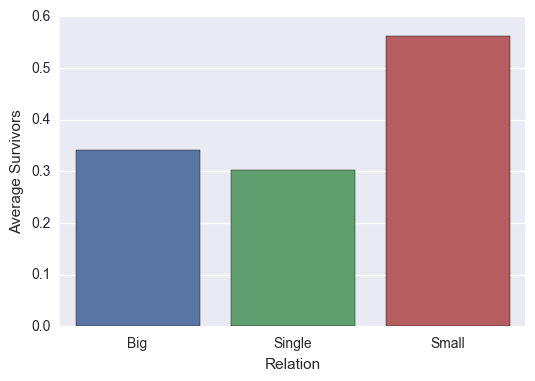

In [28]:
by_relation = titanic[['Relation', 'Survived']].groupby(['Relation'], as_index = False).mean()
by_relation_graph = sns.barplot(x = 'Relation', y = 'Survived', data = by_relation) #graph to show survivors based on family size
by_relation_graph.set(ylabel='Average Survivors')

The above graph shows that smaller familes were more likely to survive vs people who were single or with big families. This may be because it was probably easier to look out for and help each other in smaller families than in large families. Single people probably had nobody looking out for them. More statistical tests would be required to prove these statements.

In [29]:
pd.pivot_table(data = titanic[['Survived', 'Pclass','Relation']],index = 'Pclass', columns = 'Relation', aggfunc= 'mean')
#to show a survival rates based on class and size of family

Survived                    
Relation       Big    Single     Small
Pclass                                
1         0.692308  0.532110  0.734043
2         0.800000  0.346154  0.600000
3         0.158730  0.212963  0.384615

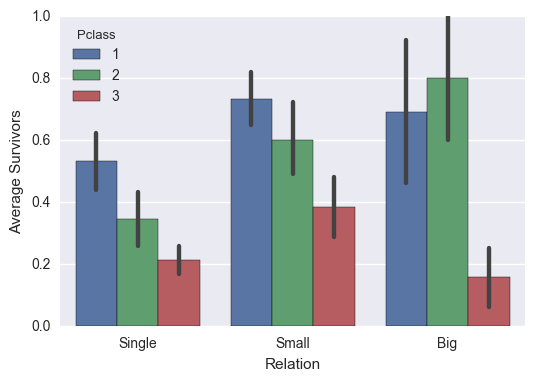

In [30]:
by_relation_class = sns.barplot(x = 'Relation', y = 'Survived', hue = 'Pclass', data = titanic, order = ['Single', 'Small', 'Big']) 
by_relation_class.set(ylabel='Average Survivors')
#to see how people of different classes survived based on family size                                                           

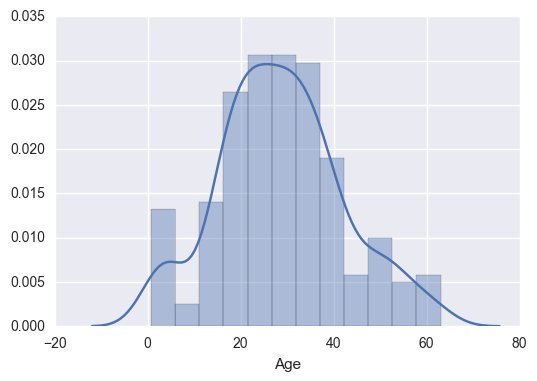

In [31]:
sns.distplot(titanic[(titanic.Sex =='female') & (titanic.Survived ==1)]['Age'])
#Age distribution of female survivors

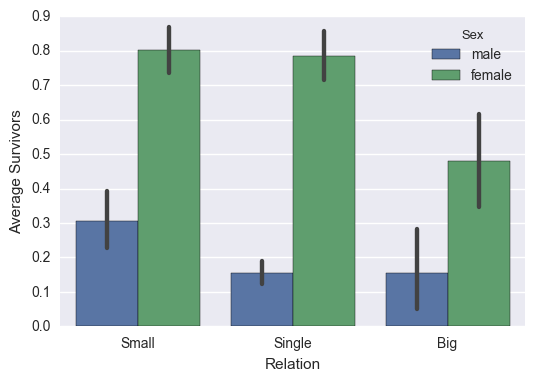

In [32]:
by_sex_relation = sns.barplot(x = 'Relation', y ='Survived', hue = 'Sex', data = titanic) 
by_sex_relation.set(ylabel='Average Survivors')
# to check how survival rates were different based on sex and family size

We can see from the graph above that, smaller families tend to have better rates of survival than bigger families/single people even when we split the data up based on sex

In [33]:
pd.pivot_table(data = titanic[['Survived', 'Pclass','Sex']],index = 'Pclass', columns = 'Sex', aggfunc= 'mean')
#analyzing survivors based on class and sex

Survived          
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

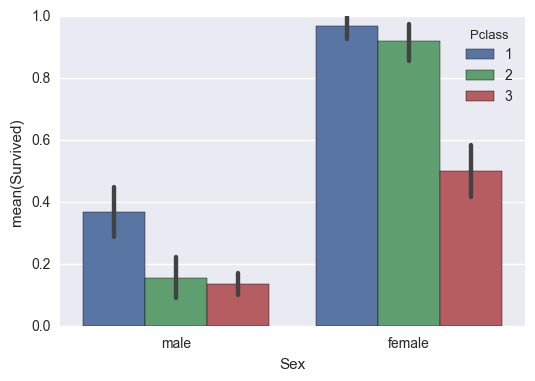

In [34]:
sns.barplot(x = 'Sex', y ='Survived', hue = 'Pclass', data = titanic)

The number of men of Pclass =3 that did not survive the crash was the highest % of all with 300 casualties. Infact the number of 
men on board of this class were more than thrice the women of class 1, yet the number of survivors are almost half of the women survivors of class 1.

We will not go deep into women of Class 1 & 2 as it is very obvious that they were given preference over the rest in terms of rescue efforts.

In [35]:
pd.pivot_table(data = titanic[['Survived', 'Pclass','Relation', 'Sex']],index = 'Pclass', columns = ['Relation', 'Sex'], aggfunc= 'mean')
#average number of survivors for male and female passengers based on class

Survived                                                  
Relation       Big              Single               Small          
Sex         female      male    female      male    female      male
Pclass                                                              
1         0.750000  0.600000  0.970588  0.333333  1.000000  0.404762
2         1.000000  0.250000  0.906250  0.097222  0.909091  0.281250
3         0.242424  0.066667  0.616667  0.121212  0.529412  0.245283

Uptil now, we've been seeing high rates of survival for women. But with this table it is quite obvious to see that most of the fatalaties that did involve women were of the lowest class. Survival rates for women in that category who were part of big families were a mere 24%

154

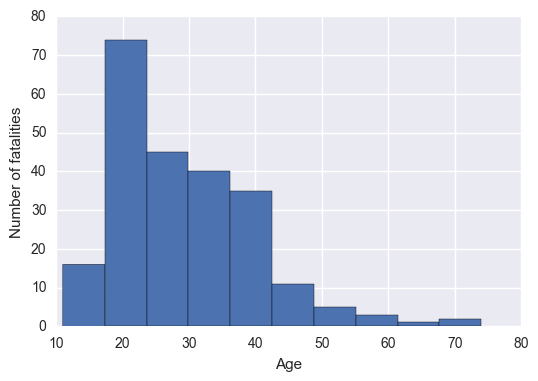

In [36]:
Male_class3_single = titanic[(titanic.Sex == 'male') & (titanic.Pclass == 3) & (titanic.Survived == 0) & (titanic.Relation == 'Single')]['Age']
Male_class3_single.hist()
plt.ylabel('Number of fatalities')
plt.xlabel('Age')
#age distribution of deaths of males of Pclass = 3
len(titanic[(titanic.Sex == 'male') & (titanic.Relation == 'Single') & (titanic.Age < 36) & (titanic.Age >= 18) & (titanic.Pclass == 3) & (titanic.Survived == 0)])
#number of single males of pclass = 3 and age between 18 to 35

The above graph shows that if you were a single, young man (18-35) and Pclass = 3, your chances of survival were very low. There were about 190 men of this category who boarded of whom 160 died (87% fatality). 

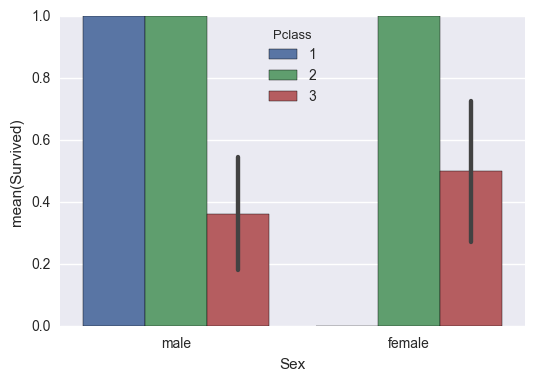

In [37]:
children = titanic[(titanic.Age <= 10) ]
sns.barplot(x = 'Sex', data = children, y = 'Survived', hue = 'Pclass')
#depicting children survivors (age <= 10)

I fount it a bit strange that female kids of class 1 had a survival rate of 0. A little more investigation showed that there was only 1 child in that category who had not survived unfortunately.
Children of class 2 seem to be the luckiest as 100% of them had survived.
Children of class 3 seemed to be the worst hit again. The average survival rate for children below the age of 10 was 60%, with children from class 3 falling short of that average mark for both boys and girls.

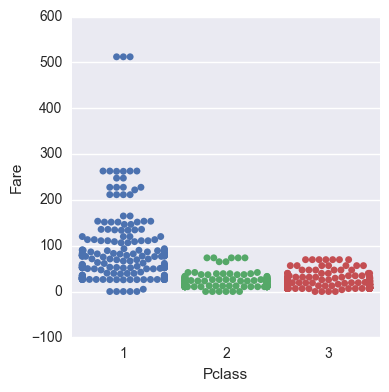

In [38]:
sns.factorplot(x="Pclass", y="Fare", data=titanic, kind="swarm");
plt.figure(figsize=(30,10))
#to see how fares were distributed among classes

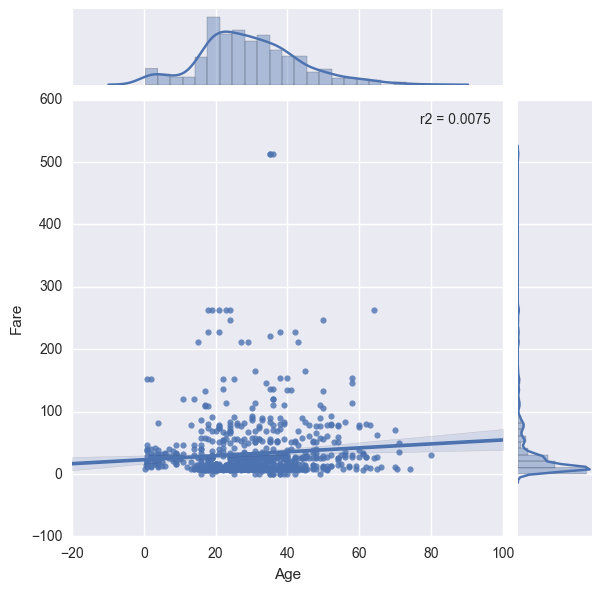

In [39]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(titanic['Age'],titanic['Fare'], kind="reg", stat_func=r2)
#To check if there was a relation between Ages of the passengers and fares they had paid

From this graph, we can see that there is a very weak r2 coefficient value(0.0089) which depicts a very weak relationship between the age factor and fares paid.

In [40]:
pd.pivot_table(data = titanic[['Fare', 'Pclass', 'Relation']], index = 'Pclass', columns = ['Relation'], aggfunc = 'mean')

Fare                      
Relation         Big     Single      Small
Pclass                                    
1         193.184615  63.672514  92.826686
2          34.482507  14.066106  28.026602
3          34.546032   9.272052  14.751445

Looking to see how mean fares vary for each class based on family size. Graphical representation below

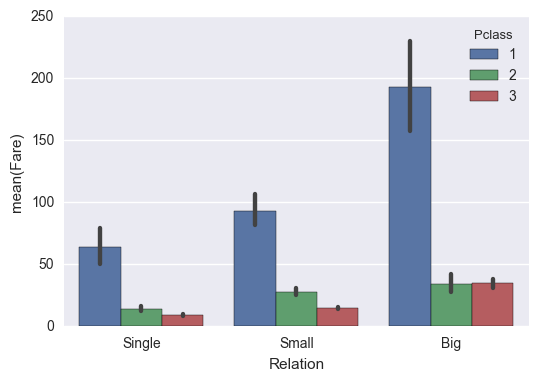

In [41]:
sns.barplot(x = 'Relation', hue = 'Pclass', y = 'Fare', data = titanic, order = ['Single', 'Small', 'Big'])

Looking at these graphs, it is fairly obvious to see that larger families tended to pay more on average to get better accommodation. Of course, this statement was hypothetical since correlation does not imply causation.

In [42]:
titanic['Embarked'] = titanic["Embarked"].fillna("S") 
#filling the remaining two values with 'S'

168

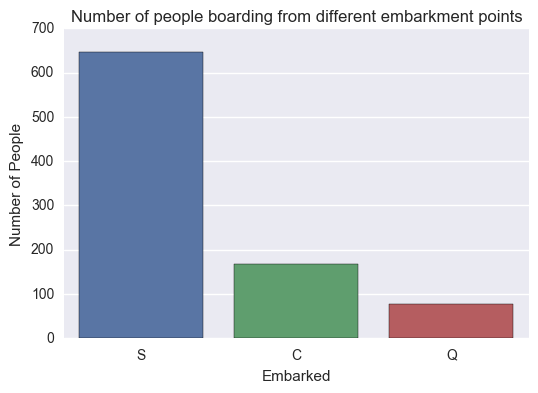

In [43]:
sns.countplot(x = 'Embarked', data = titanic)
plt.ylabel('Number of People')
plt.title('Number of people boarding from different embarkment points')
#plotting to see how many people embarked from each port
len(titanic[(titanic.Embarked == 'C')])

It would be interesting to check how many people of different classes boarded from different locations.

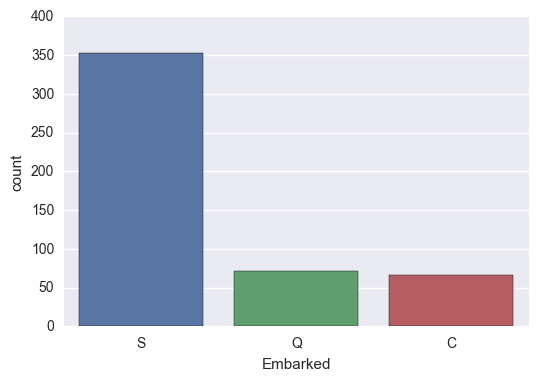

In [44]:
sns.countplot(x = 'Embarked', data = titanic[titanic.Pclass == 3])
#checking to see how many people of class 3 embarked from different locations

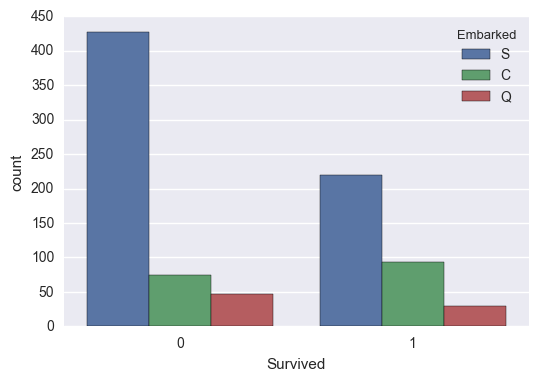

In [45]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = titanic)


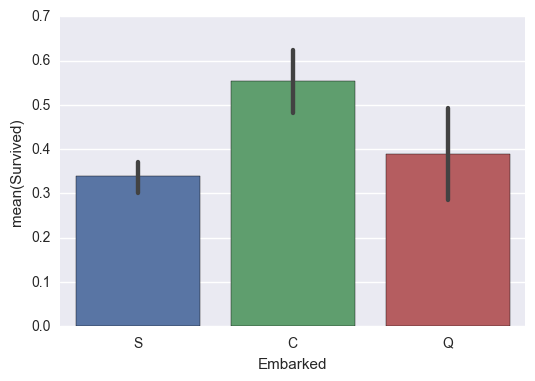

In [46]:
sns.barplot(x = 'Embarked', y = 'Survived', data= titanic)

With most of the class 3 people embarking at Southampton(S), it is fairly obvious to see why most of the casualties are also people who boarded from there.

Answers to questions posted:-
1) Mean and median (After filling out missing ages) = 29.38 and 28 respectively. Mode is also = 28, Thus showing a normal distribution.

2) Women and children had a much better chance of surviving than that of men.

3) Survival trends skewed very much in favor of the upper class people (1 & 2). This was true for both sexes and for all age groups as well.

4) Ages that were most likely to survive were in the range of 17 - 35(depending on the family sizes they were supporting) and also infant children.

5) Single people had the highest number of casualties but they also had a huge number of people that had embarked on the journey. Women who were single or were accompanied by small families had very good survival rates. Men who were accompanied by small families had better survival rates when compared to men who were single or men with big families.

6) Most of the people embarked on their journey from Southampton with the highest proportion of people from Pclass = 3. Passengers that had embarked at Southampton also had the highest proportion of fatalities. People who boarded from Cherbough had the best survival rates.

7) Correlation between age and fares was very poor. There were trends that showed that people tended to pay for more expensive tickets when travelling with bigger families.